In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Load the dataset
mnist = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Normalize the training and testing data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Convert the target variable into binary categories using keras to_categorical function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [8]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

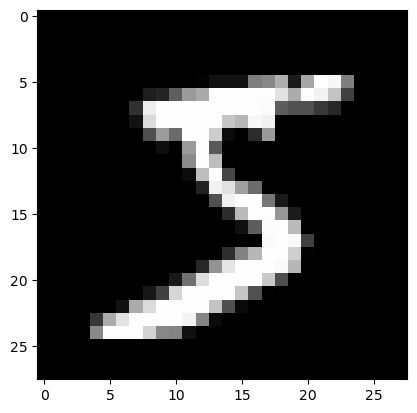

In [9]:
plt.imshow(X_train[0][:,:,0], cmap='gray')

In [10]:
def convolutional_model():
    model = Sequential()
    
    model.add(Input(shape=(28, 28, 1)))
    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
    # Flatten the output of the convolutional layers
    model.add(Flatten())
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Build the model
model = convolutional_model()
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)
print(f"Accuracy: {scores[1]} \n Error: {100-scores[1]*100}")

Epoch 1/10
300/300 - 56s - 187ms/step - accuracy: 0.9556 - loss: 0.1392 - val_accuracy: 0.9845 - val_loss: 0.0502
Epoch 2/10
300/300 - 56s - 185ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9886 - val_loss: 0.0359
Epoch 3/10
300/300 - 61s - 204ms/step - accuracy: 0.9923 - loss: 0.0254 - val_accuracy: 0.9904 - val_loss: 0.0296
Epoch 4/10
300/300 - 84s - 280ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9889 - val_loss: 0.0369
Epoch 5/10
300/300 - 66s - 220ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9898 - val_loss: 0.0352
Epoch 6/10
300/300 - 68s - 228ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9903 - val_loss: 0.0333
Epoch 7/10
300/300 - 69s - 231ms/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9902 - val_loss: 0.0326
Epoch 8/10
300/300 - 98s - 327ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9899 - val_loss: 0.0359
Epoch 9/10
300/300 - 93s - 311ms/step - accuracy: 0.9974 - loss: 0.0072 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


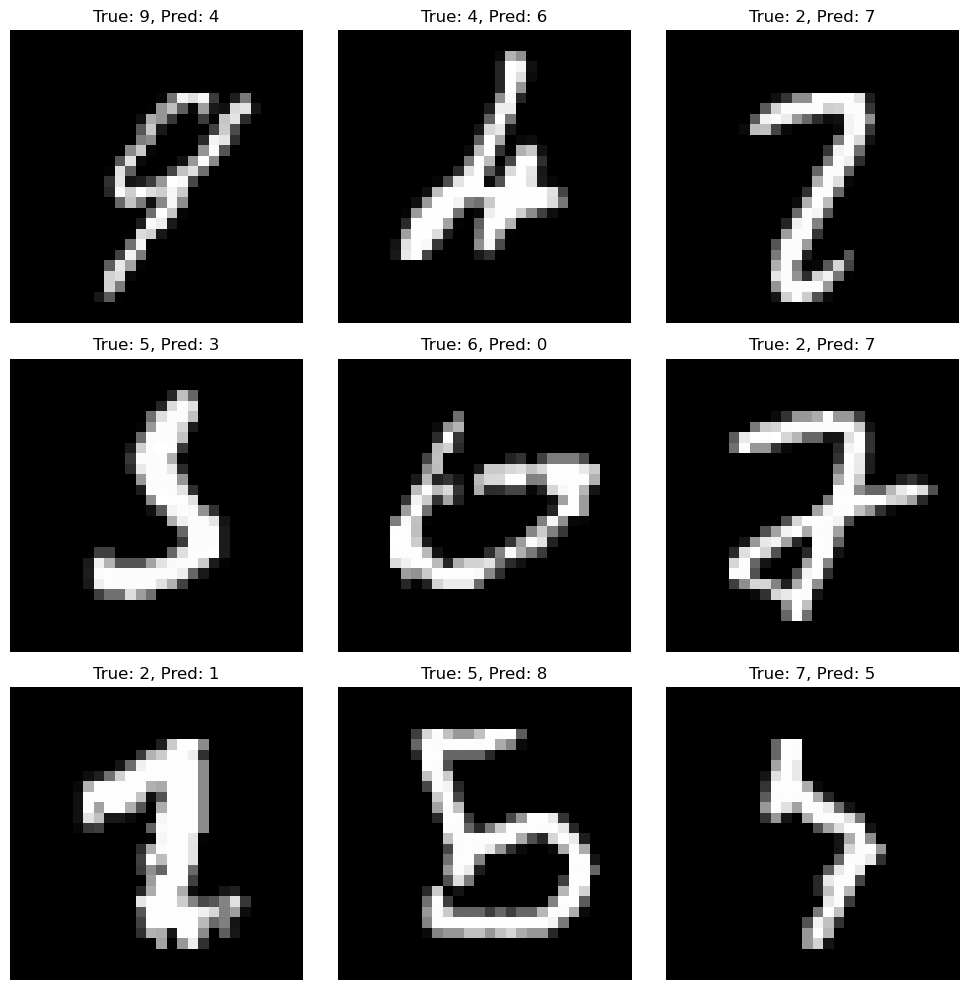

In [12]:
# Predict classes
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Plot first 9 misclassified images
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = misclassified_indices[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Predicted class: 3, True class: 3


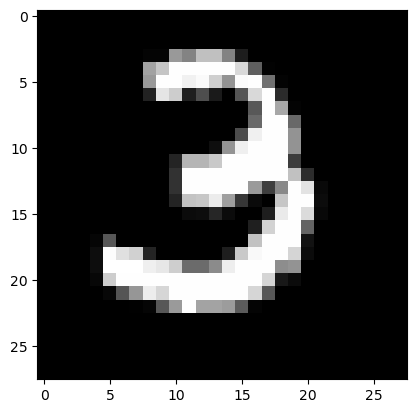

In [13]:
plt.imshow(X_test[2431][:,:,0], cmap='gray')
print(f"Predicted class: {predicted_classes[2431]}, True class: {true_classes[2431]}")